In [1]:
import feather
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
import collections
import re

In [2]:
plt.rcParams["font.family"] = 'Helvetica'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.use14corefonts'] = True

savedir = '/casa/jenny/notebooks/pan-viral_MPRA/paper_figures/'

In [3]:
%cd /casa/jenny/basic/pan-viral/220407-AICHI_GStail/level1-RTA/align-optimize/
%ls *

/casa/jenny/basic/pan-viral/220407-AICHI_GStail/level1-RTA/align-optimize
RG7834_id.txt  RO0321_id.txt  WT_id.txt  ZC2KO_id.txt
RG7834.sam     RO0321.sam     WT.sam     ZC2KO.sam


In [4]:
dfs = {}

for s in ['RO0321','RG7834','WT','ZC2KO']:
    tmp = pd.read_csv('%s_id.txt'%s,names=['A'])
    tmp['pA'] = tmp['A'].apply(lambda x: int(x.split(':')[4]))
    tmp['tag'] = tmp['A'].apply(lambda x: x.split(':')[5])
    dfs[s] = tmp

In [5]:
dfs['WT'][dfs['WT']['pA']>70][dfs['WT']['pA']<80].groupby('pA').count()


/casa/jenny/software/jupyter-py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,A,tag
pA,,
71,319,319
72,336,336
73,331,331
74,323,323
75,326,326
76,314,314
77,308,308
78,334,334
79,287,287


In [6]:
dfs['ZC2KO'][dfs['ZC2KO']['pA']>180].groupby('pA').count()
#[dfs['ZC2KO']['pA']<80].

dfs['WT'][dfs['WT']['pA']>180].groupby('pA').count()['tag']

pA
181    115
182    106
183     83
184     82
185     82
186     76
187     77
188     72
189     61
190     57
191     51
192     55
193     68
194     51
195     65
196     71
197     40
198     60
199     62
200     48
201     52
202     50
203     55
204     76
205     41
206     56
207     53
208     43
209     40
210     49
211     48
212     41
213     45
214     36
215     30
216     24
217     25
218     27
219     23
220     34
221     32
222     35
223     26
224     31
225     33
226     36
227     25
228     41
229     66
230     57
231    153
Name: tag, dtype: int64

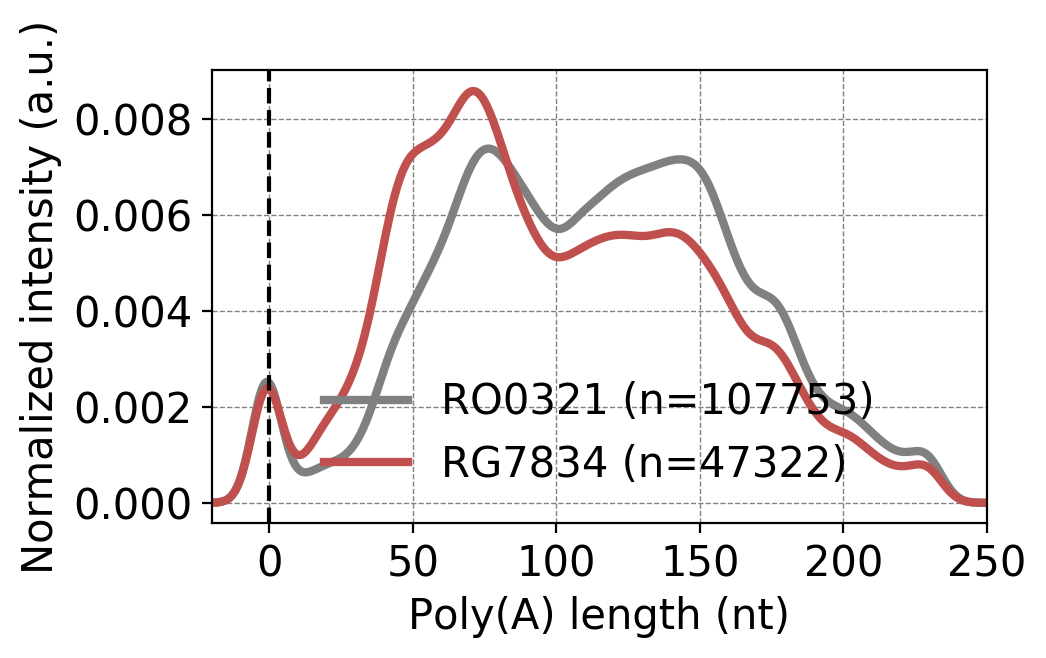

In [73]:
fig,ax = plt.subplots(1,1,figsize=(5,3),dpi=200)
fig.set_facecolor('white')

colors = ["grey","#C0504D"]
for i,s in enumerate(['RO0321','RG7834']):
    dfs[s].pA.plot.kde(bw_method=0.1,label = '%s (n=%s)'%(s,len(dfs[s])),lw=3,ax=ax, color = colors[i])
#     dfs[s].pA.plot.kde(bw_method=0.1,label = '%s'%(s),lw=3,ax=ax, color = colors[i])

ax.set_xlabel("Poly(A) length (nt)",fontsize = 15)
ax.set_ylabel("Normalized intensity (a.u.)",fontsize =15)
ax.set_xlim(-20,250)
ax.set_xticks(np.arange(0,290,50))
ax.axvline(0,color='k',lw=1.5,linestyle='--')
# ax.grid(linestyle='--',lw=1,color='grey')

ax.legend(loc="best", fontsize='x-large',prop={'size': 15},frameon=False)
ax.tick_params (axis = 'x', labelsize =15)
ax.tick_params (axis = 'y', labelsize =15)
ax.grid(linestyle='--',lw=0.5,color='grey')
# ax.set_title('IH', fontsize = 15)

fig.savefig(savedir+'Figure4G(Tailseq,Tail).pdf', format='pdf', transparent=True, bbox_inches='tight')

In [14]:
s = 'RO0321'

G = []
C = []
U = []
comp = []
others = []

for tag in dfs[s][dfs[s]['pA']>25]['tag']:
    if len(tag)>=4:
        comp.append(tag)
    elif tag in ['G','GA','GAA','GG','GGG','GAG']:
        G.append(tag)
    elif tag in ['C','CA','CAA','CC','CCC','CAC']:
        C.append(tag)
    elif tag in ['T','TA','TAA','TT','TTT','TAT']:
        U.append(tag)
    elif tag!='':
        others.append(tag)

total = len(dfs[s][dfs[s]['pA']>20])
print(total)
print(len(G),len(C),len(U),len(others),len(comp))
print('%.2f'%(len(G)/total*100),'%.2f'%(len(C)/total*100),'%.2f'%(len(U)/total*100))


print(collections.Counter(G))
print(collections.Counter(C))
print(collections.Counter(U))
print(collections.Counter(others))
print(collections.Counter(comp))

103317
5759 2376 3860 1164 1115
5.57 2.30 3.74
Counter({'GA': 3162, 'G': 2368, 'GG': 188, 'GAG': 34, 'GGG': 7})
Counter({'CA': 1316, 'C': 1041, 'CC': 16, 'CAC': 3})
Counter({'TA': 1528, 'T': 1412, 'TT': 553, 'TAA': 254, 'TTT': 98, 'TAT': 15})
Counter({'GT': 172, 'TG': 145, 'GC': 115, 'CT': 91, 'CG': 85, 'GGA': 70, 'GTA': 62, 'TGA': 57, 'TTA': 50, 'GAT': 46, 'CGA': 41, 'TC': 40, 'GTT': 34, 'TAG': 25, 'GAC': 23, 'CAG': 15, 'CCA': 14, 'TCA': 13, 'GCA': 10, 'TTG': 9, 'GGT': 6, 'CTA': 5, 'GCG': 4, 'TGG': 4, 'CTT': 3, 'GGC': 3, 'TGT': 3, 'CTG': 3, 'TAC': 3, 'TGC': 3, 'GTG': 2, 'TCT': 2, 'GCC': 2, 'CAT': 1, 'CGT': 1, 'CCT': 1, 'CGG': 1})
Counter({'GAGA': 56, 'GATA': 50, 'TTTT': 50, 'GGAA': 42, 'GACA': 36, 'TAGA': 34, 'GAGAA': 33, 'TAAGA': 22, 'GGAAA': 22, 'TTTTT': 21, 'TTTTTT': 19, 'CAGA': 18, 'TGAAA': 17, 'TTAA': 15, 'TGAA': 14, 'GAGT': 14, 'GTAAA': 14, 'GTTT': 14, 'GATT': 12, 'TATT': 12, 'TACA': 12, 'GATAA': 11, 'CCAACCAAA': 11, 'TAGAA': 10, 'CGAAA': 10, 'GTAA': 10, 'GTAAAA': 8, 'TTAATT': 8

In [15]:
s = 'RG7834'

G = []
C = []
U = []
comp = []
others = []

for tag in dfs[s][dfs[s]['pA']>20]['tag']:
    if len(tag)>=4:
        comp.append(tag)
    elif tag in ['G','GA','GAA','GG','GGG','GAG']:
        G.append(tag)
    elif tag in ['C','CA','CAA','CC','CCC','CAC']:
        C.append(tag)
    elif tag in ['T','TA','TAA','TT','TTT','TAT']:
        U.append(tag)
    elif tag!='':
        others.append(tag)

total = len(dfs[s][dfs[s]['pA']>20])
print(total)
print(len(G),len(C),len(U),len(others),len(comp))
print('%.2f'%(len(G)/total*100),'%.2f'%(len(C)/total*100),'%.2f'%(len(U)/total*100))


print(collections.Counter(G))
print(collections.Counter(C))
print(collections.Counter(U))
# print(collections.Counter(others))

45102
1040 474 891 190 211
2.31 1.05 1.98
Counter({'GA': 555, 'G': 462, 'GG': 21, 'GAG': 2})
Counter({'CA': 263, 'C': 191, 'CC': 20})
Counter({'T': 388, 'TA': 289, 'TT': 151, 'TAA': 46, 'TTT': 17})


In [16]:
s = 'WT'

G = []
C = []
U = []
comp = []
others = []

for tag in dfs[s][dfs[s]['pA']>25]['tag']:
    if len(tag)>=4:
        comp.append(tag)
    elif tag in ['G','GA','GAA','GG','GGG','GAG']:
        G.append(tag)
    elif tag in ['C','CA','CAA','CC','CCC','CAC']:
        C.append(tag)
    elif tag in ['T','TA','TAA','TT','TTT','TAT']:
        U.append(tag)
    elif tag!='':
        others.append(tag)
total = len(dfs[s][dfs[s]['pA']>20])
print(total)
print(len(G),len(C),len(U),len(others),len(comp))
print('%.2f'%(len(G)/total*100),'%.2f'%(len(C)/total*100),'%.2f'%(len(U)/total*100))

print(collections.Counter(G))
print(collections.Counter(C))
print(collections.Counter(U))
# print(collections.Counter(others))

34705
1998 983 1477 512 564
5.76 2.83 4.26
Counter({'GA': 1070, 'G': 844, 'GG': 73, 'GAG': 11})
Counter({'CA': 554, 'C': 411, 'CC': 15, 'CAC': 3})
Counter({'T': 593, 'TA': 500, 'TT': 237, 'TAA': 88, 'TTT': 55, 'TAT': 4})


In [17]:
s = 'ZC2KO'

G = []
C = []
U = []
comp = []
others = []

for tag in dfs[s][dfs[s]['pA']>20]['tag']:
    if len(tag)>=4:
        comp.append(tag)
    elif tag in ['G','GA','GAA','GG','GGG','GAG']:
        G.append(tag)
    elif tag in ['C','CA','CAA','CC','CCC','CAC']:
        C.append(tag)
    elif tag in ['T','TA','TAA','TT','TTT','TAT']:
        U.append(tag)
    elif tag!='':
        others.append(tag)
        
total = len(dfs[s][dfs[s]['pA']>20])
print(total)
print(len(G),len(C),len(U),len(others),len(comp))
print('%.2f'%(len(G)/total*100),'%.2f'%(len(C)/total*100),'%.2f'%(len(U)/total*100))

print(collections.Counter(G))
print(collections.Counter(C))
print(collections.Counter(U))
# print(collections.Counter(others))
print(collections.Counter(comp))

43634
720 354 902 147 155
1.65 0.81 2.07
Counter({'G': 360, 'GA': 344, 'GG': 12, 'GAG': 4})
Counter({'CA': 200, 'C': 149, 'CC': 4, 'CAC': 1})
Counter({'T': 449, 'TT': 208, 'TA': 200, 'TAA': 23, 'TTT': 20, 'TAT': 2})
Counter({'TTTT': 13, 'GAGA': 7, 'GATA': 7, 'TAGAGA': 5, 'TTTTT': 4, 'GACA': 4, 'TAATA': 4, 'TTAT': 4, 'CCCCAAA': 4, 'CTCCAAA': 4, 'TTTAATT': 3, 'GAGG': 3, 'CCAACCAAA': 3, 'GCTCGTAGTTGGATC': 2, 'GCAAA': 2, 'TTTTTTTTTT': 2, 'GATGT': 2, 'TATTTTT': 2, 'GTAGA': 2, 'TTTATTTT': 2, 'TTAG': 2, 'CCAA': 2, 'TTCTTAA': 1, 'CGAACCAA': 1, 'TTCT': 1, 'TTAAA': 1, 'TAATACAACAAAA': 1, 'GGAA': 1, 'TTTTTTT': 1, 'TTTTTT': 1, 'TTATATAAAAAATTAAAAA': 1, 'CAGG': 1, 'TGAAAATCCACTAAAAAGA': 1, 'TTTTTAAAATAATAA': 1, 'GGAGAA': 1, 'TACAATTACAAAGACACAC': 1, 'CTATAAAACAAA': 1, 'TTGACAAAAACCAG': 1, 'TATACTTAA': 1, 'CTACCATACA': 1, 'TTTTAAACAAAAA': 1, 'TGAAAG': 1, 'GATCA': 1, 'GTATAAAAA': 1, 'CTAATTAAAA': 1, 'TTTATTTCATATCAGCAAA': 1, 'TTATAATCTAATTACAAAT': 1, 'GCAGGCACAAAAA': 1, 'TGTTATCCAATGGTTAAAA': 1, 'TTG

103317
5783 2382 3893 1170 1126
5.60 2.31 3.77
Counter({'GA': 3172, 'G': 2381, 'GG': 189, 'GAG': 34, 'GGG': 7})
Counter({'CA': 1318, 'C': 1045, 'CC': 16, 'CAC': 3})
Counter({'TA': 1536, 'T': 1421, 'TT': 567, 'TAA': 255, 'TTT': 99, 'TAT': 15})


42055
952 437 832 178 205
2.26 1.04 1.98
Counter({'GA': 507, 'G': 424, 'GG': 19, 'GAG': 2})
Counter({'CA': 243, 'C': 175, 'CC': 19})
Counter({'T': 364, 'TA': 270, 'TT': 138, 'TAA': 44, 'TTT': 16})


32508
1895 930 1403 475 551
5.83 2.86 4.32
Counter({'GA': 1012, 'G': 804, 'GG': 68, 'GAG': 11})
Counter({'CA': 522, 'C': 390, 'CC': 14, 'CAC': 3, 'CCC': 1})
Counter({'T': 565, 'TA': 469, 'TT': 228, 'TAA': 83, 'TTT': 54, 'TAT': 4})


41795
690 340 857 141 150
1.65 0.81 2.05
Counter({'G': 342, 'GA': 332, 'GG': 12, 'GAG': 4})
Counter({'CA': 189, 'C': 146, 'CC': 4, 'CAC': 1})
Counter({'T': 421, 'TT': 199, 'TA': 193, 'TAA': 22, 'TTT': 20, 'TAT': 2})


In [18]:
RO0321_G = {'GA': 3172, 'G': 2381, 'GG': 189, 'GAG': 34, 'GGG': 7}
RO0321_C = {'CA': 1318, 'C': 1045, 'CC': 16, 'CAC': 3,'CCC':0}
RO0321_U = {'TA': 1536, 'T': 1421, 'TT': 567, 'TAA': 255, 'TTT': 99, 'TAT': 15}


RG7834_G = {'GA': 507, 'G': 424, 'GG': 19, 'GAG': 2,'GGG':0}
RG7834_C = {'CA': 243, 'C': 175, 'CC': 19,'CAC':0,'CCC':0}
RG7834_U = {'T': 364, 'TA': 270, 'TT': 138, 'TAA': 44, 'TTT': 16,'TAT' : 0}


WT_G = {'GA': 1012, 'G': 804, 'GG': 68, 'GAG': 11,'GGG':0}
WT_C = {'CA': 522, 'C': 390, 'CC': 14, 'CAC': 3, 'CCC': 1}
WT_U = {'T': 565, 'TA': 469, 'TT': 228, 'TAA': 83, 'TTT': 54, 'TAT': 4}


ZC2KO_G = {'G': 342, 'GA': 332, 'GG': 12, 'GAG': 4,'GGG':0}
ZC2KO_C = {'CA': 189, 'C': 146, 'CC': 4, 'CAC': 1,'CCC':0}
ZC2KO_U = {'T': 421, 'TT': 199, 'TA': 193, 'TAA': 22, 'TTT': 20, 'TAT': 2}

In [20]:
G_rates = []
C_rates = []
T_rates = []

for s in ['RO0321','RG7834','WT','ZC2KO']:

    terminal  = {'G':0, 'C':0, 'T':0,'A':0,'N':0}
    penul = {'G':0, 'C':0, 'T':0,'A':0,'N':0}
    internal = {'G':0, 'C':0, 'T':0,'A':0,'N':0}


    for tag in dfs[s][dfs[s]['pA']>25]['tag']:
        if len(tag)<=4 or (tag.count('A') > len(tag)/2):

            if len(tag)>=1:
                terminal[tag[-1]] = terminal[tag[-1]] +1
            if len(tag)>=2:
                penul[tag[-2]] = penul[tag[-2]] +1
            if len(tag)>=3:
                internal[tag[-3]] = internal[tag[-3]] +1

    G_rates.append([terminal['G'],penul['G'],internal['G']])
    C_rates.append([terminal['C'],penul['C'],internal['C']])
    T_rates.append([terminal['T'],penul['T'],internal['T']])

G_rates

[[2907, 4002, 424], [525, 673, 46], [1010, 1413, 183], [428, 417, 34]]

In [21]:
totals = [len(dfs[s][dfs[s]['pA']>25]) for s in ['RO0321','RG7834','WT','ZC2KO']]
totals

[102868, 44671, 34414, 43178]

In [22]:
sample_list = ['RO0321','RG7834','Parental','ZCCHC2 KO']

/casa/jenny/software/jupyter-py36/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


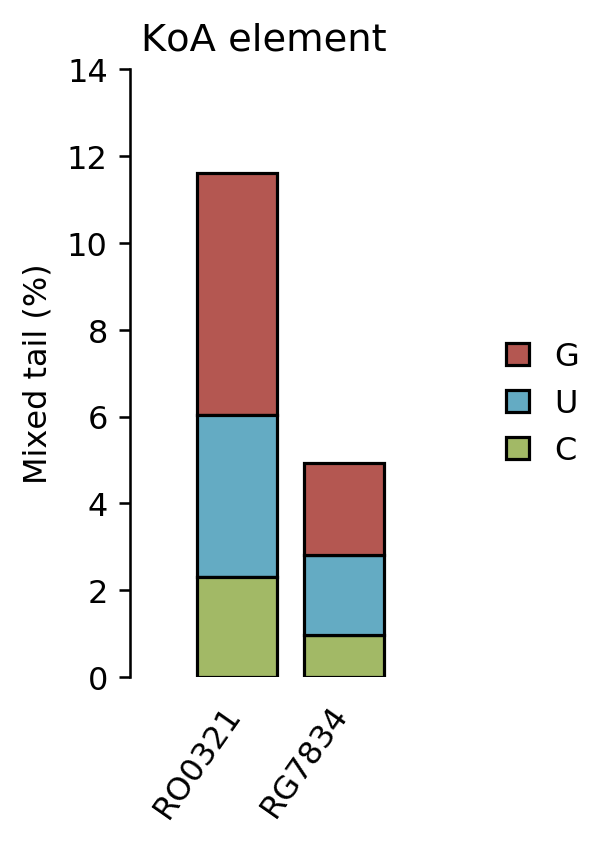

In [68]:
nonA_rates = [[5759,2376,3860],[952,437,832],[1998,983,1477],[720,354,902]]

totals = [len(dfs[s][dfs[s]['pA']>20]) for s in ['RO0321','RG7834','WT','ZC2KO']]

plt.rcParams["font.family"] = 'Helvetica'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.use14corefonts'] = True
fig,ax = plt.subplots(1,1,figsize=(1.5,3.5),dpi = 230)
fig.set_facecolor('white')

for i in range(2):
    #samplesize = C_rates_nonISG[sample][1]+U_rates_nonISG[sample][1]+G_rates_nonISG[sample][1]+G_rates_nonISG[sample][2]
    if i==0:
        ax.bar([i+1],[nonA_rates[i][0]/totals[i]*100],
               bottom=[nonA_rates[i][1]/totals[i]*100+nonA_rates[i][2]/totals[i]*100],width=0.75,
               align='center',color='#B45751',label='G',zorder=2,edgecolor='k')
        ax.bar([i+1],[nonA_rates[i][2]/totals[i]*100],
               bottom=[nonA_rates[i][1]/totals[i]*100], width=0.75,align='center',
               label='U',color='#64ABC3',zorder=2,edgecolor='k')
        ax.bar([i+1],[nonA_rates[i][1]/totals[i]*100],width=0.75,align='center',
               label='C',color='#A2B966',zorder=2,edgecolor='k')
        
    else :
        ax.bar([i+1],[nonA_rates[i][1]/totals[i]*100],width=0.75,align='center',
               color='#A2B966',zorder=2,edgecolor='k')
        ax.bar([i+1],[nonA_rates[i][2]/totals[i]*100],
               bottom=[nonA_rates[i][1]/totals[i]*100], width=0.75,align='center',
               color='#64ABC3',zorder=2,edgecolor='k')
        ax.bar([i+1],[nonA_rates[i][0]/totals[i]*100],
               bottom=[nonA_rates[i][1]/totals[i]*100+nonA_rates[i][2]/totals[i]*100],width=0.75,
               align='center',color='#B45751',zorder=2,edgecolor='k')
ax.set_ylim(0,14)
ax.set_xlim(0,2.5)
ax.set_xticks([x+1.1 for x in range(2)])
ax.set_xticklabels(sample_list,fontsize=10,ha="right", rotation=55)
# ax.grid(axis='y',linestyle='--',alpha=0.2,color='k',zorder=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_ticks_position('none') 

ax.set_ylabel('Mixed tail (%)')
plt.title('KoA element')
ax.legend(frameon=False,  bbox_to_anchor=(1.3, 0.6), handlelength=0.7)
fig.tight_layout()
fig.savefig(savedir+'Figure5F(nonA).pdf',bbox_inches='tight')
plt.show()

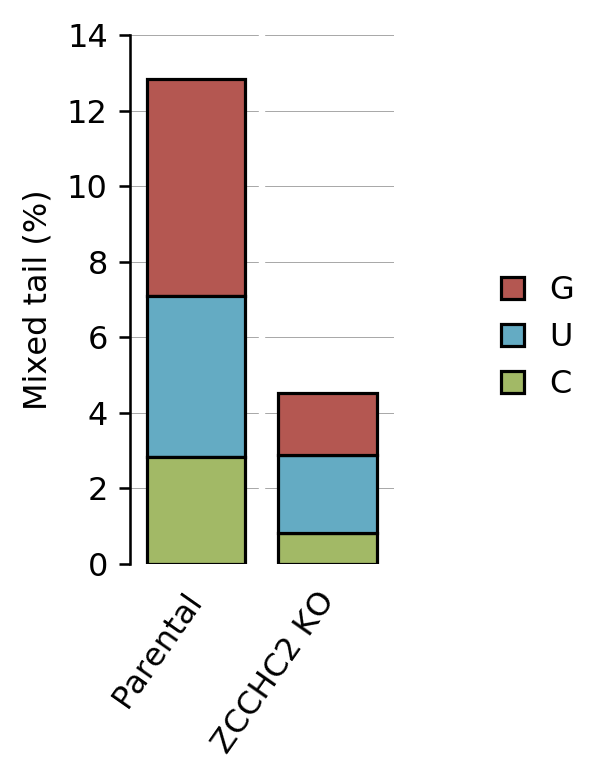

In [84]:
nonA_rates = [[5759,2376,3860],[952,437,832],[1998,983,1477],[720,354,902]]

totals = [len(dfs[s][dfs[s]['pA']>20]) for s in ['RO0321','RG7834','WT','ZC2KO']]

plt.rcParams["font.family"] = 'Helvetica'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.use14corefonts'] = True
fig,ax = plt.subplots(1,1,figsize=(2.4,3.5),dpi = 230)
fig.set_facecolor('white')

for i in [2,3]:
    #samplesize = C_rates_nonISG[sample][1]+U_rates_nonISG[sample][1]+G_rates_nonISG[sample][1]+G_rates_nonISG[sample][2]
    if i==2:
        ax.bar([i+1],[nonA_rates[i][0]/totals[i]*100],
               bottom=[nonA_rates[i][1]/totals[i]*100+nonA_rates[i][2]/totals[i]*100],width=0.75,
               align='center',color='#B45751',label='G',zorder=2,edgecolor='k')
        ax.bar([i+1],[nonA_rates[i][2]/totals[i]*100],
               bottom=[nonA_rates[i][1]/totals[i]*100], width=0.75,align='center',
               label='U',color='#64ABC3',zorder=2,edgecolor='k')
        ax.bar([i+1],[nonA_rates[i][1]/totals[i]*100],width=0.75,align='center',
               label='C',color='#A2B966',zorder=2,edgecolor='k')
        
    else :
        ax.bar([i+1],[nonA_rates[i][1]/totals[i]*100],width=0.75,align='center',
               color='#A2B966',zorder=2,edgecolor='k')
        ax.bar([i+1],[nonA_rates[i][2]/totals[i]*100],
               bottom=[nonA_rates[i][1]/totals[i]*100], width=0.75,align='center',
               color='#64ABC3',zorder=2,edgecolor='k')
        ax.bar([i+1],[nonA_rates[i][0]/totals[i]*100],
               bottom=[nonA_rates[i][1]/totals[i]*100+nonA_rates[i][2]/totals[i]*100],width=0.75,
               align='center',color='#B45751',zorder=2,edgecolor='k')
ax.set_ylim(0,14)
ax.set_xlim(2.5,4.5)
ax.set_xticks([x+1.1 for x in [2,3]])
ax.set_xticklabels(sample_list[2:],fontsize=10,ha="right", rotation=55)
# ax.grid(axis='y',linestyle='--',alpha=0.2,color='k',zorder=1)


ax.yaxis.grid(True, color='gray',linestyle='-' , linewidth=0.3,alpha=0.7,zorder = 0)

for i,var in enumerate([3.5]):
    ax.plot((var,var),(0,14),color='white',linestyle='-', linewidth=2,zorder = 2)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_ticks_position('none') 

ax.set_ylabel('Mixed tail (%)')
plt.title('')
ax.legend(frameon=False,  bbox_to_anchor=(1.3, 0.6), handlelength=0.7)
fig.tight_layout()
fig.savefig(savedir+'Figure6G(nonA).pdf',bbox_inches='tight')
plt.show()